In [ ]:
!pip install ultralytics opencv-python ffmpeg-python numpy matplotlib


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 993.8/993.8 kB 14.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 44.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 31.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 30.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 12.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 83.6 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstall

In [ ]:
from google.colab import files
uploaded = files.upload()
video_path = list(uploaded.keys())[0]


In [ ]:
import cv2
import numpy as np

# Load video
video_path = "input_video.mp4"
cap = cv2.VideoCapture(video_path)

# Get video properties
fps = int(cap.get(cv2.CAP_PROP_FPS))
frame_width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
frame_height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))

# Define video writer
fourcc = cv2.VideoWriter_fourcc(*'mp4v')
out = cv2.VideoWriter("output_video.mp4", fourcc, fps, (frame_width, frame_height))

while cap.isOpened():
    ret, frame = cap.read()
    if not ret:
        break

    # Draw placeholder overlay
    overlay = frame.copy()
    box_x, box_y, box_w, box_h = frame_width - 400, 50, 350, 180
    cv2.rectangle(overlay, (box_x, box_y), (box_x + box_w, box_y + box_h), (0, 0, 0), -1)
    alpha = 0.5
    cv2.addWeighted(overlay, alpha, frame, 1 - alpha, 0, frame)

    # Add sample text
    font = cv2.FONT_HERSHEY_SIMPLEX
    text_color = (255, 255, 255)
    cv2.putText(frame, "Player 1       Player 2", (box_x + 60, box_y + 20), font, 0.6, text_color, 2)
    cv2.putText(frame, "Shot Speed: 0.0 km/h     0.0 km/h", (box_x + 10, box_y + 50), font, 0.5, text_color, 2)
    cv2.putText(frame, "Player Speed: 0.0 km/h   0.0 km/h", (box_x + 10, box_y + 80), font, 0.5, text_color, 2)

    # Write processed frame to output video
    out.write(frame)

cap.release()
out.release()

print("Processing Complete. Check the output video.")


Processing Complete. Check the output video.


In [ ]:
from ultralytics import YOLO
import cv2
import numpy as np
import torch

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


In [ ]:
# Load YOLOv8 model (pre-trained on COCO dataset)
model = YOLO("yolov8n.pt")  # You can use "yolov8s.pt" for better accuracy


100%|██████████| 6.25M/6.25M [00:00<00:00, 72.5MB/s]


In [ ]:
# Load video
video_path = "input_video.mp4"  # Change this if using a different video
cap = cv2.VideoCapture(video_path)

# Get video properties
fps = int(cap.get(cv2.CAP_PROP_FPS))
frame_width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
frame_height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))

# Define video writer
fourcc = cv2.VideoWriter_fourcc(*'mp4v')
out = cv2.VideoWriter("output_video.mp4", fourcc, fps, (frame_width, frame_height))

# Dictionary to store player positions
player_positions = {}

while cap.isOpened():
    ret, frame = cap.read()
    if not ret:
        break

    # Convert frame to RGB for YOLO
    results = model(frame)

    # Process YOLO detections
    for result in results:
        for box in result.boxes:
            x1, y1, x2, y2 = map(int, box.xyxy[0])  # Bounding box coordinates
            conf = box.conf[0]  # Confidence score
            cls = int(box.cls[0])  # Class index

            if cls == 0 and conf > 0.5:  # Class 0 = Person
                cv2.rectangle(frame, (x1, y1), (x2, y2), (0, 255, 0), 2)
                center_x = (x1 + x2) // 2
                center_y = (y1 + y2) // 2

                # Store player position for speed calculation
                player_positions.setdefault(cls, []).append((center_x, center_y))

    # Overlay a static scoreboard (We will update it dynamically later)
    overlay = frame.copy()
    box_x, box_y, box_w, box_h = frame_width - 400, 50, 350, 180
    cv2.rectangle(overlay, (box_x, box_y), (box_x + box_w, box_y + box_h), (0, 0, 0), -1)
    alpha = 0.5
    cv2.addWeighted(overlay, alpha, frame, 1 - alpha, 0, frame)

    # Draw static text
    font = cv2.FONT_HERSHEY_SIMPLEX
    text_color = (255, 255, 255)
    cv2.putText(frame, "Player 1       Player 2", (box_x + 60, box_y + 20), font, 0.6, text_color, 2)
    cv2.putText(frame, "Shot Speed: 0.0 km/h     0.0 km/h", (box_x + 10, box_y + 50), font, 0.5, text_color, 2)
    cv2.putText(frame, "Player Speed: 0.0 km/h   0.0 km/h", (box_x + 10, box_y + 80), font, 0.5, text_color, 2)

    # Write processed frame to output video
    out.write(frame)

cap.release()
out.release()

print("Processing Complete. Check the output video.")



0: 384x640 8 persons, 298.1ms
Speed: 14.7ms preprocess, 298.1ms inference, 31.3ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 8 persons, 144.2ms
Speed: 6.1ms preprocess, 144.2ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 8 persons, 1 tennis racket, 130.3ms
Speed: 4.0ms preprocess, 130.3ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 8 persons, 2 tennis rackets, 124.9ms
Speed: 3.4ms preprocess, 124.9ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 8 persons, 2 tennis rackets, 143.7ms
Speed: 3.4ms preprocess, 143.7ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 8 persons, 1 tennis racket, 130.0ms
Speed: 5.8ms preprocess, 130.0ms inference, 1.3ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 8 persons, 1 tennis racket, 132.9ms
Speed: 4.2ms preprocess, 132.9ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)

0: 384x

In [ ]:
!pip install ultralytics opencv-python ffmpeg-python numpy matplotlib lap deep_sort_realtime


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 18.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.4/8.4 MB 87.6 MB/s eta 0:00:00


In [ ]:
import cv2
import numpy as np
from ultralytics import YOLO
from deep_sort_realtime.deepsort_tracker import DeepSort
from collections import defaultdict

# Load YOLOv8 model (players + ball)
model = YOLO("yolov8n.pt")  # Use "yolov8s.pt" for better accuracy

# Initialize DeepSORT Tracker
tracker = DeepSort(max_age=30)

# Load video
video_path = "input_video.mp4"
cap = cv2.VideoCapture(video_path)

# Get video properties
fps = int(cap.get(cv2.CAP_PROP_FPS))  # Frames per second
frame_width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
frame_height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))

# Define video writer
fourcc = cv2.VideoWriter_fourcc(*'mp4v')
out = cv2.VideoWriter("tracked_video.mp4", fourcc, fps, (frame_width, frame_height))

# **Real-world dimensions**
court_length_meters = 23.77  # Tennis court length
court_width_meters = 8.23    # Tennis court width
pixels_per_meter_x = frame_width / court_length_meters
pixels_per_meter_y = frame_height / court_width_meters

# Store tracking data
player_positions = {}
player_speeds = defaultdict(list)
ball_positions = {}
shot_speeds = defaultdict(list)

while cap.isOpened():
    ret, frame = cap.read()
    if not ret:
        break

    results = model(frame)  # Run YOLO detection
    detections = []

    for result in results:
        for box in result.boxes:
            x1, y1, x2, y2 = map(int, box.xyxy[0])  # Bounding box
            conf = box.conf[0]
            cls = int(box.cls[0])  # Class index

            if cls == 0 and conf > 0.5:  # Person (Player)
                detections.append(([x1, y1, x2 - x1, y2 - y1], conf.item(), "player"))
            elif cls == 32 and conf > 0.5:  # Tennis Ball
                detections.append(([x1, y1, x2 - x1, y2 - y1], conf.item(), "ball"))

    tracks = tracker.update_tracks(detections, frame=frame)

    # Initialize player speed values
    player_1_speed = 0.0
    player_2_speed = 0.0
    shot_speed = 0.0

    for track in tracks:
        if not track.is_confirmed():
            continue

        track_id = track.track_id
        x, y, w, h = map(int, track.to_ltwh())

        # **Track Player Movement & Speed**
        if "player" in track.det_class:
            if track_id in player_positions:
                prev_x, prev_y = player_positions[track_id]
                dx_meters = abs((x - prev_x) / pixels_per_meter_x)
                dy_meters = abs((y - prev_y) / pixels_per_meter_y)
                distance_moved = (dx_meters ** 2 + dy_meters ** 2) ** 0.5
                speed_mps = distance_moved * fps
                speed_kmh = speed_mps * 3.6
            else:
                speed_kmh = 0.0

            player_positions[track_id] = (x, y)
            player_speeds[track_id].append(speed_kmh)

            if track_id == 1:
                player_1_speed = speed_kmh
            elif track_id == 2:
                player_2_speed = speed_kmh

            # Draw bounding box & label
            cv2.rectangle(frame, (x, y), (x + w, y + h), (0, 255, 0), 2)
            cv2.putText(frame, f"ID {track_id} | {speed_kmh:.1f} km/h", (x, y - 10),
                        cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 255), 2)

        # **Track Ball Movement & Shot Speed**
        if "ball" in track.det_class:
            if track_id in ball_positions:
                prev_x, prev_y = ball_positions[track_id]
                dx_meters = abs((x - prev_x) / pixels_per_meter_x)
                dy_meters = abs((y - prev_y) / pixels_per_meter_y)
                distance_moved = (dx_meters ** 2 + dy_meters ** 2) ** 0.5
                speed_mps = distance_moved * fps
                shot_speed = speed_mps * 3.6  # Convert to km/h
            else:
                shot_speed = 0.0

            ball_positions[track_id] = (x, y)
            shot_speeds[track_id].append(shot_speed)

            cv2.circle(frame, (x + w // 2, y + h // 2), 5, (0, 0, 255), -1)
            cv2.putText(frame, f"{shot_speed:.1f} km/h", (x, y - 10),
                        cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 255), 2)

    # Compute **average speed** over the last 10 frames
    avg_player_1_speed = np.mean(player_speeds[1][-10:]) if player_speeds[1] else 0.0
    avg_player_2_speed = np.mean(player_speeds[2][-10:]) if player_speeds[2] else 0.0
    avg_shot_speed = np.mean([np.mean(shot_speeds[k][-10:]) for k in shot_speeds]) if shot_speeds else 0.0

    # Overlay Stats
    overlay = frame.copy()
    box_x, box_y, box_w, box_h = frame_width - 400, 50, 350, 230
    cv2.rectangle(overlay, (box_x, box_y), (box_x + box_w, box_y + box_h), (0, 0, 0), -1)
    cv2.addWeighted(overlay, 0.5, frame, 1 - 0.5, 0, frame)

    # Draw Stats Table
    font = cv2.FONT_HERSHEY_SIMPLEX
    text_color = (255, 255, 255)

    cv2.putText(frame, "     Player 1     Player 2", (box_x + 80, box_y + 30), font, 0.6, text_color, 2)
    cv2.putText(frame, f"Speed: {player_1_speed:.1f} km/h    {player_2_speed:.1f} km/h",
                (box_x + 10, box_y + 80), font, 0.5, text_color, 2)
    cv2.putText(frame, f"Shot Speed: {shot_speed:.1f} km/h", (box_x + 10, box_y + 120), font, 0.5, text_color, 2)
    cv2.putText(frame, f"Avg Speed: {avg_player_1_speed:.1f} km/h    {avg_player_2_speed:.1f} km/h",
                (box_x + 10, box_y + 160), font, 0.5, text_color, 2)
    cv2.putText(frame, f"Avg Shot Speed: {avg_shot_speed:.1f} km/h", (box_x + 10, box_y + 200), font, 0.5, text_color, 2)

    # Write processed frame to output video
    out.write(frame)

cap.release()
out.release()
print("✅ **Tracking Complete. Check 'tracked_video.mp4'**")



0: 384x640 8 persons, 152.0ms
Speed: 3.8ms preprocess, 152.0ms inference, 2.6ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 8 persons, 140.7ms
Speed: 4.5ms preprocess, 140.7ms inference, 1.2ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 8 persons, 1 tennis racket, 141.6ms
Speed: 7.0ms preprocess, 141.6ms inference, 1.2ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 8 persons, 2 tennis rackets, 137.1ms
Speed: 3.9ms preprocess, 137.1ms inference, 1.3ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 8 persons, 2 tennis rackets, 149.7ms
Speed: 3.8ms preprocess, 149.7ms inference, 1.3ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 8 persons, 1 tennis racket, 134.6ms
Speed: 3.9ms preprocess, 134.6ms inference, 1.2ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 8 persons, 1 tennis racket, 142.5ms
Speed: 4.3ms preprocess, 142.5ms inference, 1.3ms postprocess per image at shape (1, 3, 384, 640)

0: 384x64

In [ ]:
from google.colab import files
files.download("tracked_video.mp4")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>


0: 384x640 8 persons, 245.1ms
Speed: 9.5ms preprocess, 245.1ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 8 persons, 140.7ms
Speed: 8.1ms preprocess, 140.7ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 8 persons, 1 tennis racket, 218.5ms
0: 384x640 8 persons, 1 tennis racket, 218.5ms
Speed: 4.4ms preprocess, 218.5ms inference, 2.1ms postprocess per image at shape (1, 3, 384, 640)
Speed: 4.4ms preprocess, 218.5ms inference, 2.1ms postprocess per image at shape (1, 3, 384, 640)


0: 384x640 8 persons, 2 tennis rackets, 232.7ms
0: 384x640 8 persons, 2 tennis rackets, 232.7ms
Speed: 4.3ms preprocess, 232.7ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)
Speed: 4.3ms preprocess, 232.7ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


0: 384x640 8 persons, 2 tennis rackets, 180.1ms
Speed: 5.3ms preprocess, 180.1ms inference, 1.2ms postprocess per image at shape (1, 3, 384, 640)
0: 384x64

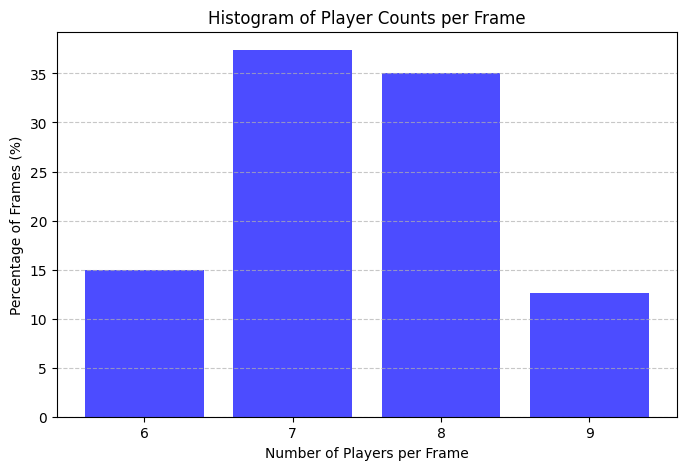

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter
from ultralytics import YOLO

# Load the YOLOv8 model (ensure it's installed in Colab)
model = YOLO("yolov8n.pt")  # Pretrained model

# Load video
video_path = "input_video.mp4"  # Change if using a different video
cap = cv2.VideoCapture(video_path)

# Get video properties
total_frames = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
fps = int(cap.get(cv2.CAP_PROP_FPS))

# Dictionary to store frame-wise player count
frame_counts = []

while cap.isOpened():
    ret, frame = cap.read()
    if not ret:
        break

    # Run YOLO detection
    results = model(frame)

    player_count = 0
    for result in results:
        for box in result.boxes:
            cls = int(box.cls[0])  # Class index
            if cls == 0:  # Class 0 = Person
                player_count += 1

    frame_counts.append(player_count)

cap.release()

# Count occurrences of each player count
count_distribution = Counter(frame_counts)
total_processed_frames = sum(count_distribution.values())

# Calculate percentages
percentages = {k: (v / total_processed_frames) * 100 for k, v in count_distribution.items()}

# Sort results for histogram
sorted_counts = sorted(percentages.keys())
sorted_percentages = [percentages[k] for k in sorted_counts]

# Display results
print("Player Count Distribution:")
for num_players, percent in percentages.items():
    print(f"Frames with {num_players} players: {percent:.2f}%")

# Plot Histogram
plt.figure(figsize=(8, 5))
plt.bar(sorted_counts, sorted_percentages, color="blue", alpha=0.7)
plt.xlabel("Number of Players per Frame")
plt.ylabel("Percentage of Frames (%)")
plt.title("Histogram of Player Counts per Frame")
plt.xticks(range(min(sorted_counts), max(sorted_counts) + 1))
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()
